<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA 2 
・  PCA  in Sklean

If you not seen part one check out the link bellow

https://jarvisjapan.com/2021/11/01/data-science-101-principle-component-analysis-with-numpy-you-do-it-in-your-head-with-out-even-knowing

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [102]:
# Load the faces datasets
data_dic= fetch_olivetti_faces()
data=data_dic["images"] 
ids=data_dic["target"]

# [SKlearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) 

### Step 1 define a PCA model 

sklearn.decomposition.PCA(n_components=None, copy=True, 
                          whiten=False, svd_solver='auto', tol=0.0, 
                          iterated_power='auto', random_state=None)


In [103]:
from sklearn.decomposition import PCA
n_components=2
pca = PCA(n_components=n_components, random_state=42)

Step2 fit data to PCA model

pca.fit(X)

X-> array-like of shape (n_samples, n_features) .

X data need to be normalized before hand to get correct results 

In [104]:
def normalize(X):
  mu=np.mean(X, axis=0) #Mean 
  std=np.std(X,axis=0) #Standard deviataion 
  #Deal with std vales of zero
  std_filled = std.copy()
  std_filled[std==0] = 1. 
  Xbar = ((X-mu)/std_filled) #Normalized so mean is zero 
  return Xbar,mu,std

dim=data.shape #Data shape 
Xbar,mu,std= normalize(data/255) #Normailzed data 
X=Xbar.reshape(-1,dim[1]*dim[2]) 
print(X.shape)  #Fit data n_samples (Imanges), n_features(pixels)
pca.fit(X)

(400, 4096)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
pca.get_covariance() #Data covaraince 

array([[ 6.527302  ,  0.28631276,  0.3204528 , ..., -0.2528329 ,
        -0.24417733, -0.22683364],
       [ 0.2863128 ,  6.593156  ,  0.36204296, ..., -0.27917767,
        -0.2733655 , -0.25416845],
       [ 0.3204528 ,  0.36204293,  6.6785617 , ..., -0.3106105 ,
        -0.3063406 , -0.28495505],
       ...,
       [-0.25283292, -0.27917764, -0.31061053, ...,  6.524511  ,
         0.23996437,  0.22263119],
       [-0.24417733, -0.2733655 , -0.30634063, ...,  0.23996437,
         6.5037003 ,  0.21628001],
       [-0.22683364, -0.25416845, -0.28495505, ...,  0.22263119,
         0.21628001,  6.4719396 ]], dtype=float32)

(2, 64, 64)


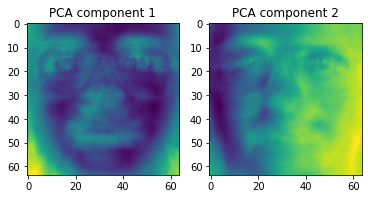

In [114]:
pca_components=pca.components_.reshape(2,dim[1],dim[2])
print(pca_components.shape)
fig,axs= plt.subplots(1,len(pca_components))

for i,ax in enumerate(axs):
  ax.imshow(pca_components[i])
  ax.set_title(f"PCA component {i+1}")


In [115]:
64*64

4096

Step 4 transform data data to get principle components 

X_2d = pca.transform(X)

In [109]:
pca_features=pca.transform(X)
print(pca_features.shape)

(400, 2)


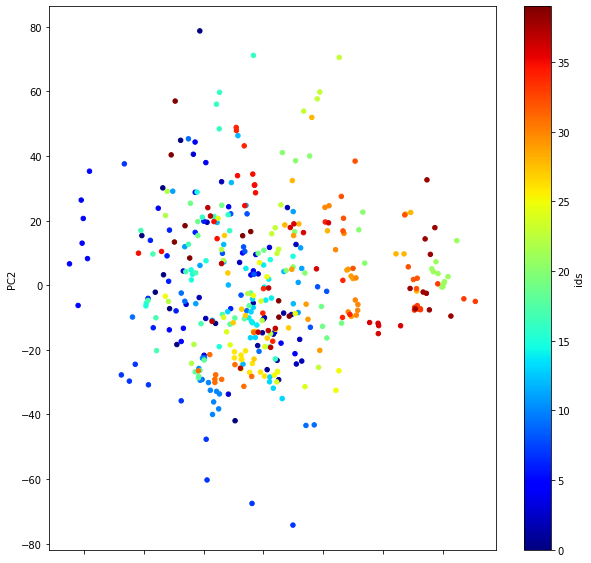

In [113]:
df=pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
df["ids"]=ids
df.plot.scatter(x="PC1",y="PC2",c="ids",cmap="jet",figsize=(10,10))

Step 3 View the PCA components 

# pca.explained_variance_ratio_
Outputs the  Contribution rate and cumulative contribution rate, these give us infomration for each component on how much data remains from the orignal image/ Summing the two we get retained information 


In [116]:
print("pca.explained_variance_ratio_ :",pca.explained_variance_ratio_)
print(f"information retained {round(np.sum(pca.explained_variance_ratio_)*100,2)} %")

pca.explained_variance_ratio_ : [0.26876438 0.12342374]
information retained 39.22 %


# PCA by reduction percentrage. 
In sklean putting a interger in n?components of PCA reduce the data to that many component. But you can also put in a fraction. 

pca = PCA(n_components=0.66)

This would reduce the data infromation to 66% of the orgianl and find the ammount of compoents needed to do that 

In [55]:
pca2 = PCA(n_components=0.66)
pca2.fit(X)
print('infromation retained: ', np.sum(pca2.explained_variance_ratio_))
print('n_compoments: ', pca2.n_components_) 

infromation retained:  0.6605544
n_compoments:  10


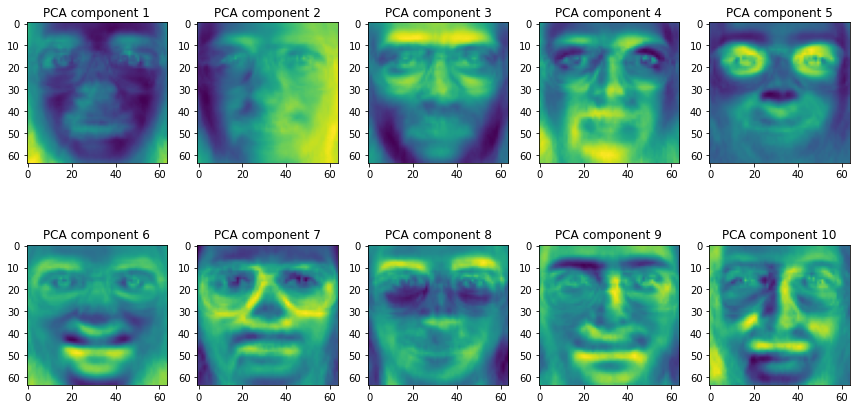

In [77]:
pca2_components=pca2.components_.reshape(pca2.n_components_,dim[1],dim[2])

fig,axs= plt.subplots(2,len(pca2_components)//2,figsize=(12,12))
axs=axs.reshape(-1)
for i,ax in enumerate(axs):
  ax.imshow(pca2_components[i])
  ax.set_title(f"PCA component {i+1}")
fig.tight_layout(h_pad=-25)

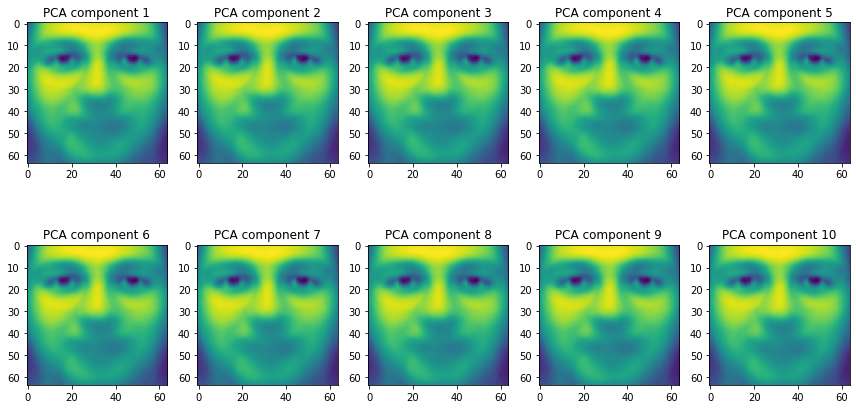

In [100]:
#Plot the componets unmormalized 
pca2_components=pca2.components_.reshape(pca2.n_components_,dim[1],dim[2])

fig,axs= plt.subplots(2,len(pca2_components)//2,figsize=(12,12))
axs=axs.reshape(-1)
for i,ax in enumerate(axs):
  ax.imshow(pca2_components[i]*std+mu)
  ax.set_title(f"PCA component {i+1}")
fig.tight_layout(h_pad=-25)